## Import Library

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

## Dataset

In [36]:
df = pd.read_csv("vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Cleaning Dataset

In [37]:
impute_mean = SimpleImputer(strategy='mean')
impute_modus = SimpleImputer(strategy='most_frequent' )

In [38]:
df['Year'] = impute_mean.fit_transform(df[['Year']])
df['Publisher'] = impute_modus.fit_transform(df[['Publisher']])

In [39]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Data Spliting

In [40]:
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = df["Genre"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

## Algoritma Supervised

### KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
knn.score(X_test, y_test)

0.19979919678714858

### Naive Bayes

In [45]:
gnb = GaussianNB()

In [46]:
gnb.fit(X_train,y_train)

GaussianNB()

In [47]:
gnb.score(X_test, y_test)

0.12650602409638553

## Menampilkan Visualisasi Model untuk Regresi

In [48]:
x = df[["NA_Sales"]]
y = df["Global_Sales"]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [50]:
regr = linear_model.LinearRegression()

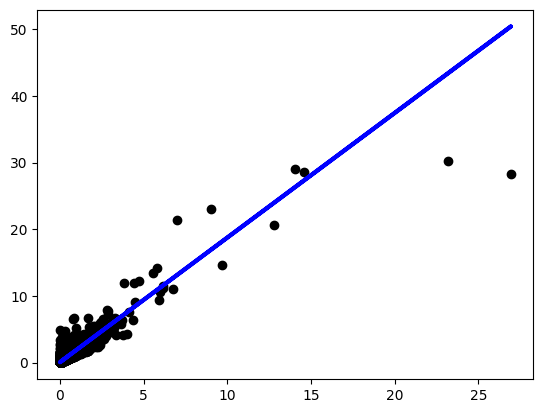

In [51]:
# Make predictions using the testing set
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.show()